In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Regresión con Funciones Base
**Facundo A. Lucianna - Inteligencia Artificial - CEIA - FIUBA**

Como vimos anteriormente, todas las regresiones que aplicamos son lineales. Sin embargo, existen relaciones que son no lineales. La forma más común de abordar este tipo de situaciones es utilizando un modelo no lineal que encuentre la mejor forma de ajustarse a los datos. Otra opción es adaptar la regresión lineal a relaciones no lineales entre variables, transformando los datos mediante funciones base.

La idea es tomar el modelo lineal multidimensional:

$$y = b + w_0 x_0 + w_1 x_1 + ... + w_n x_n $$

y construir los valores de $x_1$, $x_2$, $x_3$, etc., a partir de una entrada unidimensional $x_0$. Es decir, transformamos $x_i = f_i(x_0)$, donde $f_i()$ es alguna función que transforma los datos.

Por ejemplo, si $f_i(x) = x^i$, el modelo se convierte en una regresión polinómica:

$$y = b + w_0 x_0 + w_1 {x_0}^2 + ... + w_n {x_0}^{n+1} $$

Observen que esto sigue siendo un modelo lineal: la linealidad se refiere al hecho de que los coeficientes nunca se multiplican ni se dividen entre sí. Lo que hemos hecho es tomar los valores de $x_0$ y proyectarlos a una dimensión superior, de manera que un ajuste lineal pueda adaptarse a relaciones más complejas entre *x* e *y*.

--- 

## Tasa de reacción enzimática 

Para este caso, vamos a utilizar un conjunto de datos sintético basado en un conjunto de datos original reconocido, el cual se emplea para estudiar relaciones no lineales. Los datos provienen de un experimento realizado por [Treloar et al (1974)](https://pubmed.ncbi.nlm.nih.gov/4547468/) para estudiar la velocidad de una reacción enzimática. Durante el experimento, se midieron los conteos por minuto del producto radiactivo generado en la reacción. La cantidad de producto radiactivo producido depende de la concentración del sustrato utilizado en la reacción. Se realizaron dos mediciones: una en enzimas tratadas con el fármaco Puromycin y otra en enzimas no tratadas.

Este conjunto de datos sintético fue creado para ser un problema más atractivo de resolver que el original, que tiene muy pocos datos. Es imporante destacar que dado que son datos sintéticos, solo es válido con fines didácticos.

Para este caso, utilizaremos solo el conjunto de datos correspondiente al caso tratado con Puromycin, que está clasificado como `treated`.

In [2]:
dataset = pd.read_csv("datasets/Synthetic_Puromycin.csv") 

# Nos quedamos solo con los datos de treated
dataset = dataset[dataset["state"] == "treated"]
dataset.head()

,concentration,rate,state
0,0.818193,189.578963,treated
1,0.102685,122.118577,treated
2,0.439083,163.008055,treated
3,0.422880,183.800549,treated
4,0.133875,125.123634,treated


Veamos una descripción del conjunto de datos:

In [3]:
dataset.describe()

,concentration,rate
count,100.000000,100.000000
mean,0.529708,178.356674
std,0.296503,27.558845
min,0.026788,74.660742
25%,0.290643,170.576884
50%,0.484311,186.870742
75%,0.756742,195.542998
max,1.097336,215.934441


Y la distribución de los atributos `concentration` y el valor `rate`:

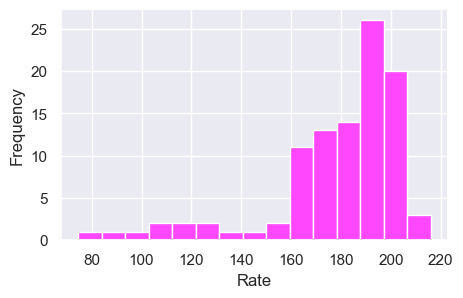

In [4]:
plt.figure(figsize=(5, 3))
dataset["rate"].hist(bins=15, color='#ff48fd')
plt.xlabel("Rate")
plt.ylabel("Frequency")
plt.show()

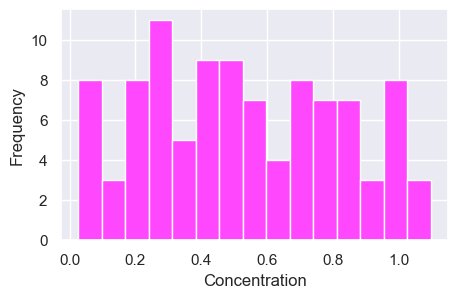

In [5]:
plt.figure(figsize=(5, 3))
dataset["concentration"].hist(bins=15, color='#ff48fd')
plt.xlabel("Concentration")
plt.ylabel("Frequency")
plt.show()

A continuación, observemos un mapa de correlación para analizar si el atributo `concentration` está correlacionado con el valor `rate`:

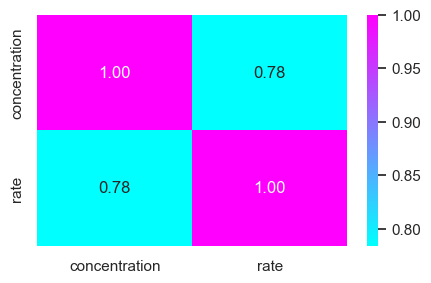

In [6]:
# Calculamos la correlación cruzada
correlacion_drug = dataset[["concentration", "rate"]].corr()

plt.figure(figsize=(5, 3))
sns.heatmap(correlacion_drug, annot=True, cmap='cool', annot_kws={"size": 12}, fmt=".2f", cbar=True)
plt.show()

Vemos un efecto interesante: hay correlación entre `concentration` y `rate`, por lo que usar una regresión lineal parece prometedor. Dado que estamos trabajando en un caso unidimensional, veamos gráficamente los datos:

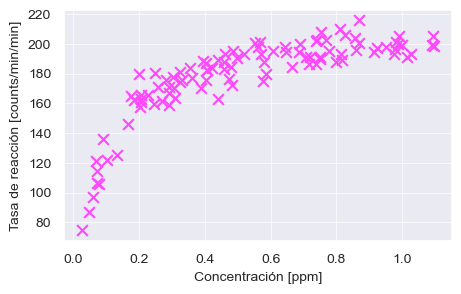

In [7]:
plt.figure(figsize=(5, 3))
plt.scatter(dataset['concentration'], dataset['rate'], color='#ff48fd', marker="x", s=60)
plt.grid(True, linewidth=0.5)
plt.xlabel('Concentración [ppm]', fontsize=10)
plt.ylabel('Tasa de reacción [counts/min/min]', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show()

La gráfica muestra que claramente no hay una relación lineal. Entonces, ¿qué nos está indicando la correlación cruzada?

## Regresión lineal

Para ello, apliquemos una regresión lineal, siguiendo los diferentes pasos que vimos:

In [8]:
from sklearn.model_selection import train_test_split

X = dataset[["concentration"]]
y = dataset["rate"]

# Separamos nuestro dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Valores de X_train:",X_train.size)
print("Valores de y_train:",y_train.size)
print("Valores de X_test:",len(X_test))
print("Valores de y_test:",len(y_test))

Valores de X_train: 70
Valores de y_train: 70
Valores de X_test: 30
Valores de y_test: 30


In [9]:
from sklearn.linear_model import LinearRegression

regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

print(f"El coeficiente de Pearson es {round(regresion_lineal.score(X_train, y_train), 2)}")

El coeficiente de Pearson es 0.62


Veamos las métricas. Aprovechemos para escribir una función que haga esto automáticamente, dado que la vamos a utilizar varias veces:

In [10]:
from sklearn.metrics import (mean_absolute_error, 
                             mean_squared_error, root_mean_squared_error, 
                             mean_absolute_percentage_error)

def obtain_reg_metrics(model, X_test, y_test, model_name="Regresion Lineal"):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(model_name + ":")
    print("Error absoluto medio:", round(mae, 3))
    print("Error cuadrático medio:", round(mse, 3))
    print("Raíz de error cuadrático medio:", round(rmse, 3))
    print(f"Error absoluto porcentual medio: {mape*100:.2f}%")

    return mae, mse, rmse, mape

obtain_reg_metrics(regresion_lineal, X_test, y_test);

Regresion Lineal:
Error absoluto medio: 12.764
Error cuadrático medio: 228.013
Raíz de error cuadrático medio: 15.1
Error absoluto porcentual medio: 7.54%


Vemos que el ajuste es malo, tal como esperábamos por la gráfica:

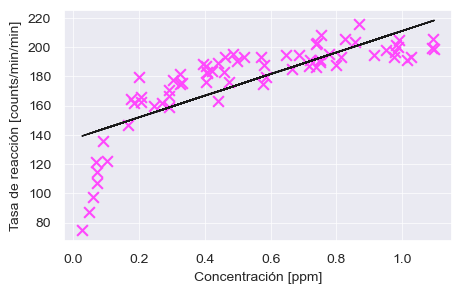

In [11]:
plt.figure(figsize=(5, 3))
plt.scatter(X_train, y_train, color='#ff48fd', marker="x", s=60)
plt.grid(True, linewidth=0.5)
plt.xlabel('Concentración [ppm]', fontsize=10)
plt.ylabel('Tasa de reacción [counts/min/min]', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.plot(X_train, regresion_lineal.predict(X_train), color="k", linewidth=1)

plt.show()

Aquí vemos que está capturando la correlación cruzada. El ajuste es malo, pero la regresión lineal es capaz de capturar algo del comportamiento entre las dos variables. Es decir, estamos en una situación de subajuste, pero el modelo está logrando capturar al menos una parte de la relación. Es más, si no buscáramos aplicar regresión a todo el rango, seguramente la regresión lineal tendría un mejor ajuste.

## Regresión Polinómica

Como siguiente paso, podemos intentar ajustar un polinomio de mayor grado. Para ello, podemos usar `PolynomialFeatures` de [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), que nos permite obtener nuevos atributos formados al elevar un atributo a diferentes potencias.

Vamos a realizar la regresión polinómica de un polinomio de grado 2, 3, 5 y 10, utilizando `Pipeline` y el modelo de regresión lineal `LinearRegression`. Esta vez utilizaremos una función llamada [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html), que crea un `Pipeline` rápidamente sin necesidad de escribir mucho código repetitivo.

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_2_model = make_pipeline(PolynomialFeatures(2),
                             LinearRegression())

poly_3_model = make_pipeline(PolynomialFeatures(3),
                             LinearRegression())

poly_5_model = make_pipeline(PolynomialFeatures(5),
                             LinearRegression())

poly_10_model = make_pipeline(PolynomialFeatures(10),
                              LinearRegression())

Entrenemos los modelos:

In [13]:
poly_2_model.fit(X_train, y_train)
poly_3_model.fit(X_train, y_train)
poly_5_model.fit(X_train, y_train)
poly_10_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])

Antes de pasar a las métricas, veamos cómo se ven gráficamente:

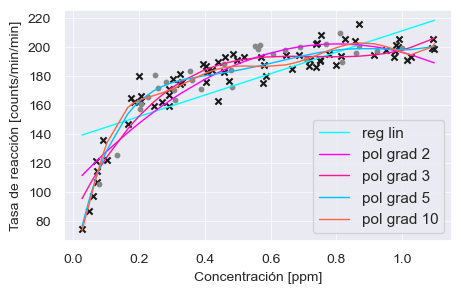

In [14]:
colormap = ["#00FFFF", "#FF00FF", "#FF1493", "#00BFFF", "#FF6347"]

plt.figure(figsize=(5, 3))
plt.scatter(X_train, y_train , color='k', marker="x", s=20)
plt.scatter(X_test, y_test , color="#888888", marker="o", s=10)
plt.grid(True, linewidth=0.5)
plt.xlabel('Concentración [ppm]', fontsize=10)
plt.ylabel('Tasa de reacción [counts/min/min]', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

X_train_sorted = X_train.sort_values(by="concentration")

plt.plot(X_train_sorted, regresion_lineal.predict(X_train_sorted), color=colormap[0], linewidth=1, label="reg lin")
plt.plot(X_train_sorted, poly_2_model.predict(X_train_sorted), color=colormap[1], linewidth=1, label="pol grad 2")
plt.plot(X_train_sorted, poly_3_model.predict(X_train_sorted), color=colormap[2],  linewidth=1, label="pol grad 3")
plt.plot(X_train_sorted, poly_5_model.predict(X_train_sorted), color=colormap[3], linewidth=1, label="pol grad 5")
plt.plot(X_train_sorted, poly_10_model.predict(X_train_sorted), color=colormap[4], linewidth=1, label="pol grad 10")

plt.legend()

plt.show()

Podemos ver que probablemente las regresiones de grado 5 y 10 presentan cierta oscilación en la zona donde la tasa se estabiliza. Veamos si esto nos genera problemas o no.

Calculemos las métricas:

In [15]:
print("Set de entrenamiento")
obtain_reg_metrics(poly_2_model, X_train, y_train, model_name="Polinomio grado 2");
print("\nSet de evaluación")
obtain_reg_metrics(poly_2_model, X_test, y_test, model_name="Polinomio grado 2");

Set de entrenamiento
Polinomio grado 2:
Error absoluto medio: 9.279
Error cuadrático medio: 141.585
Raíz de error cuadrático medio: 11.899
Error absoluto porcentual medio: 6.08%

Set de evaluación
Polinomio grado 2:
Error absoluto medio: 7.603
Error cuadrático medio: 92.187
Raíz de error cuadrático medio: 9.601
Error absoluto porcentual medio: 4.53%


In [16]:
print("Set de entrenamiento")
obtain_reg_metrics(poly_3_model, X_train, y_train, model_name="Polinomio grado 3");
print("\nSet de evaluación")
obtain_reg_metrics(poly_3_model, X_test, y_test, model_name="Polinomio grado 3");

Set de entrenamiento
Polinomio grado 3:
Error absoluto medio: 6.956
Error cuadrático medio: 88.392
Raíz de error cuadrático medio: 9.402
Error absoluto porcentual medio: 4.40%

Set de evaluación
Polinomio grado 3:
Error absoluto medio: 6.806
Error cuadrático medio: 66.65
Raíz de error cuadrático medio: 8.164
Error absoluto porcentual medio: 3.92%


In [17]:
print("Set de entrenamiento")
obtain_reg_metrics(poly_5_model, X_train, y_train, model_name="Polinomio grado 5");
print("\nSet de evaluación")
obtain_reg_metrics(poly_5_model, X_test, y_test, model_name="Polinomio grado 5");

Set de entrenamiento
Polinomio grado 5:
Error absoluto medio: 6.238
Error cuadrático medio: 57.267
Raíz de error cuadrático medio: 7.568
Error absoluto porcentual medio: 3.68%

Set de evaluación
Polinomio grado 5:
Error absoluto medio: 6.601
Error cuadrático medio: 65.043
Raíz de error cuadrático medio: 8.065
Error absoluto porcentual medio: 3.82%


In [18]:
print("Set de entrenamiento")
obtain_reg_metrics(poly_10_model, X_train, y_train, model_name="Polinomio grado 10");
print("\nSet de evaluación")
obtain_reg_metrics(poly_10_model, X_test, y_test, model_name="Polinomio grado 10");

Set de entrenamiento
Polinomio grado 10:
Error absoluto medio: 5.692
Error cuadrático medio: 50.193
Raíz de error cuadrático medio: 7.085
Error absoluto porcentual medio: 3.35%

Set de evaluación
Polinomio grado 10:
Error absoluto medio: 7.525
Error cuadrático medio: 86.052
Raíz de error cuadrático medio: 9.276
Error absoluto porcentual medio: 4.38%


Podemos ver que la regresion polinómica de orden 2 está teniendo **problema de subajuste**, mientras que la de grado 10 parece estar entrando en **sobreajuste**. El polinomio de grado 5 parece ser el mejor equilibrio.

## Otro Tipo de Funciones Base

Este problema, al visualizar los puntos, parece indicar una etapa inicial de gran cambio seguida de estabilización. Por lo tanto, probablemente un polinomio no sea el mejor ajuste. Podemos ver si una función base de logaritmo neperiano nos ofrece una mejor respuesta, junto con una raíz cuadrada.

> 🧠 **Nota**: Obviamente, no se me ocurrió en el primer intento combinar un logaritmo con una raíz cuadrada; esto fue hecho después de muchas pruebas.

Vamos a intentar transformar nuestro atributo para que respete la fórmula $x + \sqrt{x} + ln(x)$. Para ello, vamos a utilizar algunas transformaciones desarrolladas por nosotros. scikit-learn nos ofrece el `FunctionTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) para poder hacer esto:

In [19]:
from sklearn.preprocessing import FunctionTransformer

def custom_transform(x):
    return np.hstack([x, np.sqrt(x), np.log(x)])

custom_model = make_pipeline(FunctionTransformer(custom_transform),
                             LinearRegression())

custom_model.fit(X_train, y_train)


Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function custom_transform at 0x152d78e50>)),
                ('linearregression', LinearRegression())])

Veamos gráficamente lo que obtuvimos:

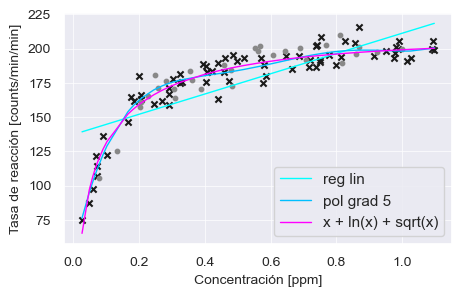

In [20]:
plt.figure(figsize=(5, 3))
plt.scatter(X_train, y_train , color='k', marker="x", s=20)
plt.scatter(X_test, y_test , color="#888888", marker="o", s=10)
plt.grid(True, linewidth=0.5)
plt.xlabel('Concentración [ppm]', fontsize=10)
plt.ylabel('Tasa de reacción [counts/min/min]', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

X_train_sorted = X_train.sort_values(by="concentration")

plt.plot(X_train_sorted, regresion_lineal.predict(X_train_sorted), color=colormap[0], linewidth=1, label="reg lin")
plt.plot(X_train_sorted, poly_5_model.predict(X_train_sorted), color=colormap[3], linewidth=1, label="pol grad 5")
plt.plot(X_train_sorted, custom_model.predict(X_train_sorted), color=colormap[1], linewidth=1, label="x + ln(x) + sqrt(x)")

plt.legend()
plt.show()

Parece ser un buen ajuste. Veamos ahora las métricas de evaluación:

In [21]:
print("Set de entrenamiento")
obtain_reg_metrics(custom_model, X_train, y_train, model_name="x + ln(x) + sqrt(x)");
print("\nSet de evaluación") 
obtain_reg_metrics(custom_model, X_test, y_test, model_name="x + ln(x) + sqrt(x)");

Set de entrenamiento
x + ln(x) + sqrt(x):
Error absoluto medio: 6.249
Error cuadrático medio: 59.564
Raíz de error cuadrático medio: 7.718
Error absoluto porcentual medio: 3.82%

Set de evaluación
x + ln(x) + sqrt(x):
Error absoluto medio: 6.412
Error cuadrático medio: 65.485
Raíz de error cuadrático medio: 8.092
Error absoluto porcentual medio: 3.79%


Aunque visualmente sea más agradable, las métricas nos indican que se comporta de manera similar al modelo de regresión polinómica de grado 5. Esto nos genera la duda: ¿con cuál de estos modelos saldrían a producción? ¿Es apropiado este conjunto de evaluación? ¿Este conjunto se aproxima a lo que se encontrará normalmente?, ¿sería preferible un modelo que no agregue oscilaciones en la zona que parece indicar estabilidad?

Y una pregunta más difícil: si el caso es multidimensional y solo se tienen métricas, ¿cómo podrían detectar situaciones como esta, donde hay dos o más modelos compitiendo, siendo uno mejor en métricas pero otro mejor en aspectos esperables del fenómeno que estamos trabajando, normalmente conocidos como reglas de negocio? En estos casos, una buena forma es ver aspectos cualitativos que nos permitan analizar casos y ver si *"tienen sentido"*.

## Usando Conocimiento del Negocio

Por último, algo que a veces puede ocurrir es que tengamos información sobre el problema que estamos manejando. En este caso, se sabe que la tasa de reacción, dada la concentración de sustrato, respeta la [ecuación de Michaelis-Menten](https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics):

$$r = \frac{R c}{K + c} $$

Donde:
- r es la tasa
- c es la concentración
- R y K son parámetros a encontrar.

> ⚠️ **Nota**: Lo que vamos a hacer a continuación no es Machine Learning, sino la aplicación de modelos estadísticos tradicionales. Una clara separación entre ambos es que en Machine Learning nos basamos puramente en modelos empíricos, mientras que aquí estamos utilizando modelos basados en fundamentos teóricos.

Ahora, así como está, podemos ajustar esta ecuación mediante métodos de mínimos cuadrados, pero **no usando la técnica de funciones base**. Aquí, *scikit-learn* no tiene herramientas para ayudarnos, por lo que tendremos que usar [*scipy*](https://scipy.org):

In [22]:
from scipy.optimize import curve_fit

def teorical_model(x, R, K):
    return (R * x) / (K + x)

# p0 son los valores iniciales para R y K. Estos valores son muy delicados, y arrancar con buenos valores
# es la clave del éxito de este ajuste. Si no me creen, inicialicen con p0=[1, 1]
params, covariance = curve_fit(teorical_model, X_train.squeeze(), y_train, p0=[100, 1])  

R_fit, K_fit = params

print("Parámetro ajustado R:", R_fit)
print("Parámetro ajustado K:", K_fit)

Parámetro ajustado R: 210.23094032636806
Parámetro ajustado K: 0.061425235428744736


Grafiquemos la curva encontrada:

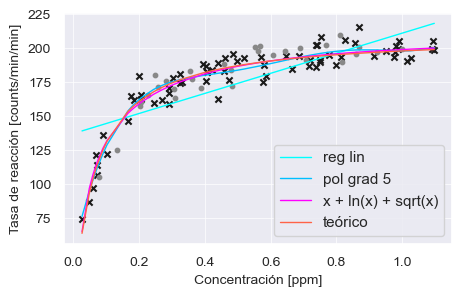

In [23]:
colormap = ["#00FFFF", "#FF00FF", "#FF1493", "#00BFFF", "#FF6347"]

plt.figure(figsize=(5, 3))
plt.scatter(X_train, y_train , color='k', marker="x", s=20)
plt.scatter(X_test, y_test , color="#888888", marker="o", s=10)
plt.grid(True, linewidth=0.5)
plt.xlabel('Concentración [ppm]', fontsize=10)
plt.ylabel('Tasa de reacción [counts/min/min]', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

X_train_sorted = X_train.sort_values(by="concentration")

plt.plot(X_train_sorted, regresion_lineal.predict(X_train_sorted), color=colormap[0], linewidth=1, label="reg lin")
plt.plot(X_train_sorted, poly_5_model.predict(X_train_sorted), color=colormap[3], linewidth=1, label="pol grad 5")
plt.plot(X_train_sorted, custom_model.predict(X_train_sorted), color=colormap[1], linewidth=1, label="x + ln(x) + sqrt(x)")
plt.plot(X_train_sorted.squeeze(), teorical_model(X_train_sorted.squeeze(), *params), color=colormap[4], linewidth=1, label="teórico")

plt.legend()
plt.show()

Vemos que el ajuste es muy similar al de nuestra regresión puramente empírica $x + ln(x) + \sqrt{x}$.

Veamos las métricas de evaluación:

In [24]:
y_pred = teorical_model(X_test.squeeze(), *params)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Error absoluto medio:", round(mae, 3))
print("Error cuadrático medio:", round(mse, 3))
print("Raíz de error cuadrático medio:", round(rmse, 3))
print(f"Error absoluto porcentual medio: {mape*100:.2f}%")

Error absoluto medio: 6.404
Error cuadrático medio: 65.905
Raíz de error cuadrático medio: 8.118
Error absoluto porcentual medio: 3.77%


Pongamos todos los resultados en una tabla:

|                               | MAE        | RMSE          | MAPE (%) |
|-------------------------------|------------|------------|----------|
| Regresion lineal              | 12.764     | 15.100     | 7.54     |
| Regresion polinomica grado 5  | 6.601      | 8.065      | 3.82     |
| $x + ln(x) + \sqrt{x}$        | 6.412      | 8.092      | 3.79     |
| Formula teórica               | 6.404      | 8.118      | 3.77     |

Con esta tabla podemos obtener varias conclusiones interesantes:

- La regresión lineal es nuestro modelo base, es el punto de partida de cuanto podemos mejorar.
- Los dos modelos empíricos son buenos. Una pista de que las oscilaciones del polinomio de grado 5 no son un fenómeno deseado en este caso es que tiene el menor RMSE, pero el mayor MAE, lo que significa que está teniendo mejor rendimiento en aquellos valores alejados, más que en el rendimiento general. En cambio, el modelo que utiliza logaritmo tiene un comportamiento opuesto.
- En este problema, todo parece indicar que los outliers son errores del instrumento, y el polinomio de grado 5 está sufriendo un poco de error de varianza. De todas formas, ambos modelos son buenos, y si los requerimientos no son exigentes, ambos funcionarán.

Luego tenemos la fórmula teórica, cuya métrica nos indica que nuestra fórmula empírica $x + ln(x) + \sqrt{x}$ es una buena aproximación. A nivel de usar la fórmula teórica, como se mencionó, no es un caso tanto de Machine Learning, sino de estadística clásica, donde nos puede interesar la interpretabilidad de lo que tenemos, más que la predicción. Los valores de los parámetros *K* y *R* tienen un significado importante:
- *R*: Es la tasa máxima de la reacción que puede ocurrir.
- *K*: Es la constante de Michaelis, que es la concentración de sustrato en la que la velocidad de la reacción es la mitad de la velocidad máxima.

Por lo tanto, los valores encontrados de estos parámetros son muy importantes para la interpretabilidad, algo que en Machine Learning rara vez encontramos.